## Import libs

In [1]:
import os
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy as sp
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from itertools import groupby
from operator import itemgetter
import matplotlib as mpl
import bootstrap_contrast as bs
from nptdms import *
#pd.set_option('display.max_colwidth', 50)
#pd.set_option('display.max_rows', 60)
mpl.rcParams['pdf.fonttype'] = 42

C:\Users\tumkayat\AppData\Local\Continuum\Anaconda3\envs\ipykernel_py2\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Read tdms files

In [487]:
# TdmsFile > Groups > Channels > Data 
f = TdmsFile("LOG_2017-04-17_17-21-29_w1118-UAS-CsChrimson_Male_14uW_Constant_NoAir_Fed.tdms")

## Inspect the file

In [489]:
## Print group names
groupNames = f.groups()
print 'Group Names:', groupNames

Group Names: [u'ExperimentInfo', u'Tracker', u'UserComments', u'ExperimentLog', u'MFC', u'Count', u'AnalogueInputs', u'ErrorCodes']


In [ ]:
## Print channel names of a particular group
channelNames = f.group_channels('Tracker')
print 'Trackers channels:', channelNames

In [490]:
for group in groupNames:
    channelNames = f.group_channels(group)
    for item in channelNames:
        print 'Group Name/Channel Name:',item

Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'ID'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Genotype'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Sex'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Temperature'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Air'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Intensity'>
Group Name/Channel Name: <TdmsObject with path /'ExperimentInfo'/'Light Status'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'FrameStamp'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Timestamp'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled 1'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled 2'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Untitled 3'>
Group Name/Channel Name: <TdmsObject wit

Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec010'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec011'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec012'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec013'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec014'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec015'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec016'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec017'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec018'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec019'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_sec020'>
Group Name/Channel Name: <TdmsObject with path /'Tracker'/'Speed_Av_mm_per_s

## Access to the data alternative 1

In [ ]:
## Get the data from a channel
Genotype = f.channel_data('ExperimentInfo','Genotype')
Tracking = f.channel_data('Tracker','Untitled 1')

print 'Genotype:', Genotype
print 'Tracker(cXmm001):', Tracking
print 'Length of the cXmm data:', len(Tracking)

## Access to the data alternative 2

In [559]:
## Get the data from a channel 2
channel = f.object('ExperimentLog','Frame timer (ms)')
data = channel.data
len(data)
#time = channel.time_track()

30

In [ ]:
channel1 = f.object('Count','PatternState')
data1 = channel1.data  

In [ ]:
channel1 = f.object('Count','Timestamp')
data1 = channel1.data 

## Transfer the data into a Pandas df

In [ ]:
## Loading data into a Pandas Df
df = f.as_dataframe()
#df
#df.to_csv('tdmsfile2.csv')

## Get the light ON/OFF information

In [491]:
metaData = f.object().properties
metaData

OrderedDict([(u'Start_Time',
              datetime.datetime(2017, 4, 17, 9, 21, 29, 201239, tzinfo=<UTC>)),
             (u'End_Time',
              datetime.datetime(2017, 4, 17, 9, 24, 29, 149232, tzinfo=<UTC>)),
             (u'Num_Enabled_ROI', 52),
             (u'Num_Missed_Frames_VideoIn', 0),
             (u'Num_Missed_Frames_Tracker', 26),
             (u'Num_Missed_Frames_Unstable', 0),
             (u'Num_Missed_Frames_Logger', 0),
             (u'Num_Missed_Frames_VideoRec', 0),
             (u'Num_Events', 0),
             (u'Num_Logged_Frames', 3021),
             (u'X_mm_per_pixel', 0.36500000953674316),
             (u'Y_mm_per_pixel', 0.36500000953674316)])

In [ ]:
data1 = df["/\'Count\'/\'Obj1_cX\'"]

In [ ]:
data3 = df["/'Tracker'/'HeadX_pix001'"]

In [ ]:
#data1.isnull().sum()
data1

In [ ]:
t = "/'Tracker'/'HeadX_pix001'"
"/'Tracker'/'HeadX_pix001"

In [ ]:
data2 = df[t]

In [ ]:
patterns = df["/\'Count\'/\'PatternState'"]

In [ ]:
pat01 = patterns[patterns == 'Pattern 01'].index
pat10 = patterns[patterns == 'Pattern 10'].index

p01_min = min(pat01)
p01_max = max(pat01)
p10_min = min(pat10)
p10_max = max(pat10)

In [ ]:
p01_min

In [ ]:
pat01_first_light_exposure = min(df["/\'Count\'/\'Obj1_InLight'"][p01_min:p01_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].index) if not df["/\'Count\'/\'Obj1_InLight'"][p01_min:p01_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].empty else 0
pat10_first_light_exposure = min(df["/\'Count\'/\'Obj1_InLight'"][p10_min:p10_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].index) if not df["/\'Count\'/\'Obj1_InLight'"][p10_min:p10_max][df["/\'Count\'/\'Obj1_InLight'"] == '1'].empty else 0

In [ ]:
df

In [ ]:
fig1 = plt.figure()
ax1 = plt.subplot(111)

sns.set(style="ticks", palette="bright", color_codes=True)
sns.despine()
ax1.set_ylabel('Diff')
ax1.set_xlabel('Time')

ax1.plot(range(len(data2)), data2)
ax1.axvspan(p10_min,p10_max,color='red',alpha=0.3)
ax1.axvspan(p01_min,p01_max,color='red',alpha=0.3)
ax1.axvline(pat01_first_light_exposure,color='black')
ax1.axvline(pat10_first_light_exposure,color='black')
#ax1.plot(range(len(data2)), data2,color='red')
#plt.savefig('HeadX_vs_Cx.pdf',dpi=1000,bbox_inches='tight')
plt.show()

In [ ]:
diff = [abs(float(x) - float(y)) for x, y in zip(data1, data3)]

In [ ]:
df_pat01 = df[df["/\'Count\'/\'PatternState'"] == 'Pattern 01']    
df_pat10 = df[df["/\'Count\'/\'PatternState'"] == 'Pattern 10'] 

In [ ]:
a = min(df_pat01.index),max(df_pat01.index)

In [ ]:
##Get the chunks where the light is ON   
df_pat01 = df[df["/\'Count\'/\'PatternState'"] == 'Pattern 01']    
df_pat10 = df[df["/\'Count\'/\'PatternState'"] == 'Pattern 10'] 

##Check number of flies in the df
num_of_flies = sum(df.columns.str.contains("/'Tracker'/'HeadX_pix"))

temp = {'FlyID':[],'Pattern 01 First light contact index':[],'Pattern 10 First light contact index':[]}
for fly in range(1,num_of_flies+1):
    ## format the fly index into 3 digits number,i.e '5' >> '005' 
    flyID = format(str(fly).zfill(3))
    
    ## generate IDs for the data need to be accessed from the df
    fly_headX_pix_ID = "/'Tracker'/'HeadX_pix" + str(flyID) + "'"
    fly_inLight_ID = "/\'Count\'/\'Obj%s_InLight'" % fly
    
    ## find the index where the fly first contacted with light in each pattern
    pat01_first_light_contact = df_pat01.index[df_pat01[fly_inLight_ID] == '1'][0] if not df_pat01.index[df_pat01[fly_inLight_ID] == '1'].empty else None 
    pat10_first_light_contact = df_pat10.index[df_pat10[fly_inLight_ID] == '1'][0] if not df_pat10.index[df_pat10[fly_inLight_ID] == '1'].empty else None 
    
    temp['FlyID'].append(flyID)
    temp['Pattern 01 First light contact index'].append(pat01_first_light_contact)
    temp['Pattern 10 First light contact index'].append(pat10_first_light_contact)

results = pd.DataFrame(temp)

### Read all the tdms and corresponding pattern csv files in a directory into a pandas df

In [2]:
def ReadExperimentData(directory):
    ## Generate a single dataframe from the .tdms and pattern files 
    temp = {'Tdms file name':[],'Date':[],'Time':[],'mmPerPix':[],'Light type':[],'Light Intensity(uW/mm2)':[],'Wind status':[],
            'Satiety':[],'Genotype':[],'Sex':[],'Status':[],'Fly ID':[],'cX(pix)':[],'HeadX(pix)':[],'HeadY(pix)':[],
            'InLight':[],'First light contact index|P01':[],'First light contact index|P10':[],'LightON index|P01':[],
            'LightON index|P10':[],'Border|P01':[],'Border|P10':[]}

    ## Change directory and get a list of the files in there 
    os.chdir(directory)
    fileList = os.listdir(directory)
    
    numOfTdmsFiles = 0
    ## Loop thru the file list to find tdms files and their related csv pattern files
    for fname in fileList:
        if fname[-5:] == '.tdms':
            numOfTdmsFiles += 1
            ## Open the tdms file
            f = TdmsFile(fname) 

            ## Load the tdms into a pandas df
            TDMSdf = f.as_dataframe()
            
            try:
            ## Open the pattern csv files to extract light border info per fly
                tdmsNameNoExtension = fname[:-5]
                P01_df = pd.read_csv(tdmsNameNoExtension + '_Pattern01.csv')
                P10_df = pd.read_csv(tdmsNameNoExtension + '_Pattern10.csv')
            except:
                print 'No pattern file(s) for %s' %(tdmsNameNoExtension)
                P01_df = P01_df
                P10_df = P10_df

            ## Get exp info from the tdms filename
            tdmsNameNoExtension = tdmsNameNoExtension.split('_')
            date = tdmsNameNoExtension[1]
            time = tdmsNameNoExtension[2]
            genotype = tdmsNameNoExtension[3]
            sex = tdmsNameNoExtension[4]
            intensity = tdmsNameNoExtension[5]
            lightType = tdmsNameNoExtension[6]
            windState = tdmsNameNoExtension[7]
            satiety = tdmsNameNoExtension[8]
            
            ## Get the mm per pixel coefficient
            metaData = f.object().properties
            mmPerPix = metaData['X_mm_per_pixel']
            
            ## Get status info 
            if ('w1118' in genotype) | ('W1118' in genotype):
                status = 'Parent'
            elif (('Gal4' in genotype) | ('GAL4' in genotype)) & ('UAS' in genotype):
                status = 'Offspring'
            else:
                status = 'Unknown: check your genotype names'
            
            ## simple putting fly IDs as numbers does not work due to missing chambers (i.e 3,4,..6,7)
            ## thus, get a list of column names with fly IDs
            listOfFlyIDs = TDMSdf.columns[TDMSdf.columns.str.contains("/'Tracker'/'HeadX_pix")]

            for fly in listOfFlyIDs:
                                
                ## get the fly ID from the data itself
                flyIndex = int(fly[-4:-1])
                
                ## format the fly index into 3 digits number,i.e '5' >> '005' 
                flyID = format(str(flyIndex).zfill(3))
                
                ## generate column names for the data need to be pulled from the df
                fly_cX_pix_ID = "/\'Count\'/\'Obj%s_cX'" % flyIndex 
                fly_inLight_ID = "/\'Count\'/\'Obj%s_InLight'" % flyIndex
                fly_headX_pix_ID = "/'Tracker'/'HeadX_pix" + str(flyID) + "'"
                fly_headY_pix_ID = "/'Tracker'/'HeadY_pix" + str(flyID) + "'"

                temp['Fly ID'].append(flyID)
                temp['cX(pix)'].append(TDMSdf[fly_cX_pix_ID].values.astype(float))
                temp['InLight'].append(TDMSdf[fly_inLight_ID].values.astype(float))
                temp['HeadX(pix)'].append(TDMSdf[fly_headX_pix_ID].values.astype(float))
                temp['HeadY(pix)'].append(TDMSdf[fly_headY_pix_ID].values.astype(float))

            ## Get the chunks where the light was ON   
            TDMSdf_pat01 = TDMSdf[TDMSdf["/\'Count\'/\'PatternState'"] == 'Pattern 01']    
            TDMSdf_pat10 = TDMSdf[TDMSdf["/\'Count\'/\'PatternState'"] == 'Pattern 10'] 

            LightOnP01 = min(TDMSdf_pat01.index),max(TDMSdf_pat01.index)
            LightOnP10 = min(TDMSdf_pat10.index),max(TDMSdf_pat10.index)

            for fly in listOfFlyIDs:
                ## get the fly ID from the data itself
                flyIndex = int(fly[-4:-1])
                
                ## format the fly index into 3 digits number,i.e '5' >> '005' 
                #flyID = format(str(flyIndex).zfill(3))
                
                ## generate column names for the data need to be pulled from the df
                fly_inLight_ID = "/\'Count\'/\'Obj%s_InLight'" % flyIndex

                ## find the index where the fly first contacted with light in each pattern
                P01_first_light_contact = TDMSdf_pat01.index[TDMSdf_pat01[fly_inLight_ID] == '1'][0] if not TDMSdf_pat01.index[TDMSdf_pat01[fly_inLight_ID] == '1'].empty else None 
                P10_first_light_contact = TDMSdf_pat10.index[TDMSdf_pat10[fly_inLight_ID] == '1'][0] if not TDMSdf_pat10.index[TDMSdf_pat10[fly_inLight_ID] == '1'].empty else None 

                ## append the info to temp dict
                temp['First light contact index|P01'].append(P01_first_light_contact)
                temp['First light contact index|P10'].append(P10_first_light_contact)  
                temp['Tdms file name'].append(fname)
                temp['Date'].append(date)
                temp['Time'].append(time)
                temp['mmPerPix'].append(mmPerPix)
                temp['Light type'].append(lightType)
                temp['Light Intensity(uW/mm2)'].append(intensity)
                temp['Wind status'].append(windState)
                temp['Satiety'].append(satiety)
                temp['Genotype'].append(genotype)
                temp['Sex'].append(sex)
                temp['Status'].append(status)
                temp['LightON index|P01'].append(LightOnP01)
                temp['LightON index|P10'].append(LightOnP10)
                temp['Border|P01'].append(P01_df.filter(regex='pix').iloc[1].values[flyIndex-1])
                temp['Border|P10'].append(P10_df.filter(regex='pix').iloc[1].values[flyIndex-1])

    ## Convert temp into a df
    colOrder = ['Tdms file name','Date','Time','mmPerPix','Light type','Light Intensity(uW/mm2)','Wind status',
                'Satiety','Genotype','Sex','Status','Fly ID','cX(pix)','HeadX(pix)','HeadY(pix)',
                'InLight','First light contact index|P01','First light contact index|P10','LightON index|P01',
                'LightON index|P10','Border|P01','Border|P10']

    results = pd.DataFrame(temp,columns=colOrder)
    return results, numOfTdmsFiles

In [3]:
directory = "C:/Users/tumkayat/Desktop/CodeRep/WALiSAR/BehaviroalDataAnalyses/20170417_SmallerData"
results, numOfUploadedTdmsFiles = ReadExperimentData(directory)
numOfUploadedTdmsFiles

3

In [4]:
results

,Tdms file name,Date,Time,mmPerPix,Light type,Light Intensity(uW/mm2),Wind status,Satiety,Genotype,Sex,...,cX(pix),HeadX(pix),HeadY(pix),InLight,First light contact index|P01,First light contact index|P10,LightON index|P01,LightON index|P10,Border|P01,Border|P10
0,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[144.5, 144.516, 144.621, 144.507, 143.481, 14...","[141.413833618, 144.800003052, 144.599853516, ...","[3.42001676559, 4.19999980927, 5.19969272614, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,1771.0,"(502, 1262)","(1771, 2532)",79.20,72.41
1,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[28.422, 28.434, 28.44, 29.49, 29.584, 29.398,...","[30.4058933258, 30.4058933258, 27.6050357819, ...","[1.91610896587, 1.91610896587, 3.79022955894, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",738.0,1785.0,"(502, 1262)","(1771, 2532)",79.01,72.01
2,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[57.1, 58.2, 60.209, 60.431, 61.302, 63.201, 6...","[47.6048851013, 49.5757369995, 51.5077095032, ...","[6.9376745224, 7.85857868195, 6.91254425049, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",556.0,1771.0,"(502, 1262)","(1771, 2532)",79.06,71.78
3,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[16.561, 17.485, 18.351, 19.313, 19.307, 20.29...","[9.24799919128, 9.24799919128, 9.24799919128, ...","[10.2135543823, 10.2135543823, 10.2135543823, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",632.0,1886.0,"(502, 1262)","(1771, 2532)",78.71,71.50
4,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[136.799, 136.799, 136.799, 136.799, 136.799, ...","[136.799468994, 136.799468994, 136.799468994, ...","[7.97074890137, 7.97074890137, 7.97074890137, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",502.0,1771.0,"(502, 1262)","(1771, 2532)",78.68,71.52
5,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[7.408, 7.594, 8.524, 10.306, 12.021, 10.276, ...","[9.19864368439, 7.37726783752, 6.41546154022, ...","[1.20134675503, 0.421508073807, 1.38391637802,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",502.0,NaN,"(502, 1262)","(1771, 2532)",78.52,71.19
6,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[76.104, 76.313, 78.212, 80.197, 82.193, 83.29...","[66.4929428101, 68.3856582642, 69.4023895264, ...","[7.81863451004, 7.84973239899, 6.94653511047, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",601.0,1788.0,"(502, 1262)","(1771, 2532)",78.32,70.90
7,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[5.518, 5.515, 5.493, 6.413, 6.424, 5.514, 5.4...","[6.70744419098, 6.70744419098, 5.30290794373, ...","[3.3866815567, 3.3866815567, 5.19556808472, 5....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,1771.0,"(502, 1262)","(1771, 2532)",78.03,70.85
8,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[92.8, 92.8, 92.8, 92.8, 92.8, 92.8, 92.8, 92....","[92.7998733521, 92.7998733521, 92.7998733521, ...","[3.98587536812, 3.98587536812, 3.98587536812, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",502.0,NaN,"(502, 1262)","(1771, 2532)",77.98,70.70
9,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"[44.299, 44.299, 44.299, 44.299, 44.299, 44.29...","[44.2991294861, 44.2991294861, 44.29

## Analyze the df

### Preference index after light contact

In [586]:
def PreferenceIndexAfterLightContact(df):
    numberOfFlies = df.shape[0]
    PI_afterLightContact_P01 = []
    PI_afterLightContact_P10 = []
    
    ## iterate thru the flies to calculate PI scores
    ## PI scores are calculated seperately for first and second half of the experiment
    for fly in range(0,numberOfFlies):
        
        ## get the first light contact index for the fly
        firstLightContactIndex_P01 = df['First light contact index|P01'][fly]
        firstLightContactIndex_P10 = df['First light contact index|P10'][fly]
        
        ## if the light contact index is NOT nan, calculate the PI and attach it to the list
        ## otherwise attach a np.nan value
        if not np.isnan(firstLightContactIndex_P01):
            ## get the light OFF index, so that can select InLight data from the first contact until light is OFF
            lightOFFindex_P01 = df['LightON index|P01'][fly][1]
            
            ## select the data after fly was exposed to the light
            InLightDatainTheRange_P01 = df['InLight'][fly][int(firstLightContactIndex_P01):int(lightOFFindex_P01)]
            
            ## calculate PI score
            numOfDataPoints_P01 = len(InLightDatainTheRange_P01)
            numOfInLights_P01 = sum(InLightDatainTheRange_P01)
            numOfInDarks_P01 = numOfDataPoints_P01 - numOfInLights_P01
           
            PI_P01 = float(numOfInLights_P01 - numOfInDarks_P01)/float(numOfDataPoints_P01)
            PI_afterLightContact_P01.append(PI_P01)
        
        elif np.isnan(firstLightContactIndex_P01):
            PI_afterLightContact_P01.append(np.nan)
        
        else:
            None
        
        ## same as the first half of the exp: P01
        if not np.isnan(firstLightContactIndex_P10):
            lightOFFindex_P10 = df['LightON index|P10'][fly][1]
            InLightDatainTheRange_P10 = df['InLight'][fly][int(firstLightContactIndex_P10):int(lightOFFindex_P10)]
            
            numOfDataPoints_P10 = len(InLightDatainTheRange_P10)
            numOfInLights_P10 = sum(InLightDatainTheRange_P10)
            numOfInDarks_P10 = numOfDataPoints_P10 - numOfInLights_P10
            
            PI_P10 = float(numOfInLights_P10 - numOfInDarks_P10)/float(numOfDataPoints_P10)
            PI_afterLightContact_P10.append(PI_P10)
        
        elif np.isnan(firstLightContactIndex_P10):
            PI_afterLightContact_P10.append(np.nan)
        
        else:
            None
        
        ## add the Preference Index pattern01 and pattern10 to the df
    df = df.assign(PreferenceIndex_P01 = pd.Series(PI_afterLightContact_P01, index=df.index),
                   PreferenceIndex_P10 = pd.Series(PI_afterLightContact_P10, index=df.index))
    
    df = df.assign(PreferenceIndex_Mean = pd.Series(df[['PreferenceIndex_P01','PreferenceIndex_P10']].mean(axis=1), index=df.index))
    
    droppedNans = MeanPreferenceIndexNoNANs(df)
    return df, droppedNans

## Nans in the PreferenceIndex_P01 (and P10) columns are treated as not existing in the plotting;
## therefore, when I am getting the mean of the two columns, I can't treat them as zeroes. 
## This function, first removes all the rows where either PreferenceIndex_P01 OR PreferenceIndex_P10 is Nan,
## then calculates a PreferenceIndex_Mean column to the df.
def MeanPreferenceIndexNoNANs(df):
    
    droppedNans = df.dropna(subset = ['PreferenceIndex_P10','PreferenceIndex_P01'])
    droppedNans = droppedNans.assign(PreferenceIndex_Mean_noNan = pd.Series(droppedNans[['PreferenceIndex_P01','PreferenceIndex_P10']].mean(axis=1), index = droppedNans.index))
    
    return droppedNans

In [594]:
## results is the original df that contains all the data, as well as individual preference index and the mean preference index 
## (In the PreferenceIndex_Mean, Nans are counted as not existing, i.e. P01 = 0.8, P10 = Nan, P_mean = 0.8)
## meanPreferenceIndexDF_noNan is the df, in which all the Nans in the preference index are dropped and mean preference index
## is calculated
results, PreferenceIndexDFDroppedNans = PreferenceIndexAfterLightContact(results)

### Plotting the Preference Index

In [595]:
## Prepare the dfs for Contrast plotting
results = results.assign(Genotype_Sex_Satiety_LightType_Intensity_Wind = pd.Series(results['Genotype'] + '_' + results['Sex'] + '_' +
                        results['Satiety'] + '_' + results['Light type'] + '_' + results['Light Intensity(uW/mm2)'] + '_' +
                        results['Wind status'], index = results.index))

PreferenceIndexDFDroppedNans = PreferenceIndexDFDroppedNans.assign(Genotype_Sex_Satiety_LightType_Intensity_Wind = pd.Series(PreferenceIndexDFDroppedNans['Genotype'] + 
                             '_' + PreferenceIndexDFDroppedNans['Sex'] + '_' + PreferenceIndexDFDroppedNans['Satiety'] + '_' + PreferenceIndexDFDroppedNans['Light type'] + 
                             '_' + PreferenceIndexDFDroppedNans['Light Intensity(uW/mm2)'] + '_' + PreferenceIndexDFDroppedNans['Wind status'], index = PreferenceIndexDFDroppedNans.index))

results = results.assign(Status_Sex_Satiety_LightType_Intensity_Wind = pd.Series(results['Status'] + '_' + results['Sex'] + '_' +
                        results['Satiety'] + '_' + results['Light type'] + '_' + results['Light Intensity(uW/mm2)'] + '_' +
                        results['Wind status'], index = results.index))

PreferenceIndexDFDroppedNans = PreferenceIndexDFDroppedNans.assign(Status_Sex_Satiety_LightType_Intensity_Wind = pd.Series(PreferenceIndexDFDroppedNans['Status'] + 
                             '_' + PreferenceIndexDFDroppedNans['Sex'] + '_' + PreferenceIndexDFDroppedNans['Satiety'] + '_' + PreferenceIndexDFDroppedNans['Light type'] + 
                             '_' + PreferenceIndexDFDroppedNans['Light Intensity(uW/mm2)'] + '_' + PreferenceIndexDFDroppedNans['Wind status'], index = PreferenceIndexDFDroppedNans.index))

In [584]:
results['Status_Sex_Satiety_LightType_Intensity_Wind'].unique()

array(['Parent_Male_Fed_Constant_70uW_Air',
       'Offspring_Male_Fed_Constant_70uW_Air'], dtype=object)

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_ind_ttest,pvalue_mannWhitney
0,Parent_Female_Fed_Constant_14uW_Air,Offspring_Female_Fed_Constant_14uW_Air,-0.127561,-0.273810,0.026471,95.0,True,False,0.113735,0.094100
1,Parent_Female_Fed_Constant_42uW_Air,Offspring_Female_Fed_Constant_42uW_Air,-0.100696,-0.276065,0.065686,95.0,True,False,0.261590,0.360525
2,Parent_Female_Fed_Constant_70uW_Air,Offspring_Female_Fed_Constant_70uW_Air,0.101737,-0.043572,0.253478,95.0,True,False,0.174924,0.326987


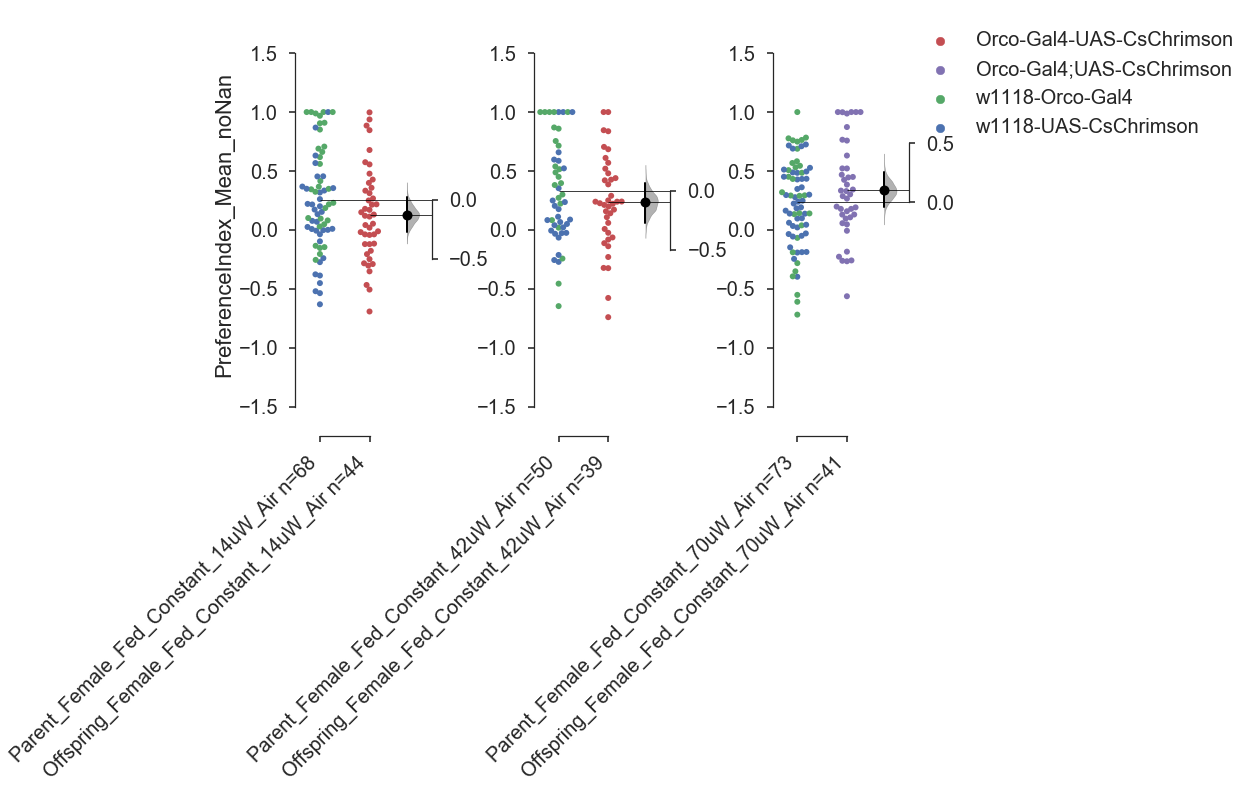

In [454]:
fig,b = bs.contrastplot(PreferenceIndexDFDroppedNans, x = 'Status_Sex_Satiety_LightType_Intensity_Wind', y = 'PreferenceIndex_Mean_noNan', color_col= 'Genotype',                      
                      idx = (('Parent_Female_Fed_Constant_14uW_Air', 'Offspring_Female_Fed_Constant_14uW_Air'),
                             ('Parent_Female_Fed_Constant_42uW_Air', 'Offspring_Female_Fed_Constant_42uW_Air'),
                             ('Parent_Female_Fed_Constant_70uW_Air', 'Offspring_Female_Fed_Constant_70uW_Air')),
                                        )

plt.savefig('PreferenceIndex_MeanNoNAN_Female_Fed_Constant_Air.pdf',dpi=1000,bbox_inches='tight')
b

### Preference index in the choice zone

In [585]:
results

,Tdms file name,Date,Time,mmPerPix,Light type,Light Intensity(uW/mm2),Wind status,Satiety,Genotype,Sex,...,First light contact index|P10,LightON index|P01,LightON index|P10,Border|P01,Border|P10,PreferenceIndex_P01,PreferenceIndex_P10,PreferenceIndex_Mean,Genotype_Sex_Satiety_LightType_Intensity_Wind,Status_Sex_Satiety_LightType_Intensity_Wind
0,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1771.0,"(502, 1262)","(1771, 2532)",79.20,72.41,NaN,0.821288,0.821288,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
1,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1785.0,"(502, 1262)","(1771, 2532)",79.01,72.01,1.000000,-0.068273,0.465863,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
2,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1771.0,"(502, 1262)","(1771, 2532)",79.06,71.78,0.229462,0.048620,0.139041,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
3,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1886.0,"(502, 1262)","(1771, 2532)",78.71,71.50,-0.577778,-0.969040,-0.773409,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
4,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1771.0,"(502, 1262)","(1771, 2532)",78.68,71.52,-0.773684,1.000000,0.113158,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
5,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,NaN,"(502, 1262)","(1771, 2532)",78.52,71.19,1.000000,NaN,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
6,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1788.0,"(502, 1262)","(1771, 2532)",78.32,70.90,0.022693,0.129032,0.075863,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
7,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1771.0,"(502, 1262)","(1771, 2532)",78.03,70.85,NaN,1.000000,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
8,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,NaN,"(502, 1262)","(1771, 2532)",77.98,70.70,1.000000,NaN,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air
9,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,1771.0,"(502, 1262)","(1771, 2532)",77.74,70.71,NaN,1.000000,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air


In [142]:
## Function 1: Detect choice zone entrance indices, store them in the df
## Pass the df to these functions:
    ## Function 2: Sort and Plot the tracts as in Wilson paper _ this only needs the entrance indices
    ## Function 3: Calculate Attraction Index from the exits _ this needs the exit indice, as well as coordination to decide 
    ## whether traversel or reversal.

def DetectEntraceandExitIndicesToTheChoiceZone(df, choiceZoneWidth_mm = 10):

    ## Lists to store the entrance and related exit info per fly for P01 and P10
    FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = []
    FromTheClosedEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = []

    FromTheWindPortEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = []
    FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = []
    
    ## Lists to stores choice zone borders per fly
    ChoiceZoneBordersPerFly_P01 = []
    ChoiceZoneBordersPerFly_P10 = []
    
    numberOfFlies = df.shape[0]

    ## get the mm to pix coefficient
    mmPerPix = df['mmPerPix'][0]

    ## convert the zone width from mm to pix
    choiceZoneWidth_pix = choiceZoneWidth_mm/mmPerPix

    for fly in range(0,numberOfFlies):

        ## one fly can have multiple decisions, therefore I will keep seperate lists per fly
        flyDecisionList_theWindPortEnd_P01 = []
        flyDecisionList_theClosedEnd_P01 = []

        flyDecisionList_theWindPortEnd_P10 = []
        flyDecisionList_theClosedEnd_P10 = []

        ## get border coordinates for the two light events per fly
        border_P01 = df.iloc[fly]['Border|P01']
        border_P10 = df.iloc[fly]['Border|P10'] 

        ## identify the choice zone lef-right borders per chamber, since borders change across chambers, even P01 vs P10 
        choiceZoneBorders_P01 = [border_P01-choiceZoneWidth_pix/2, border_P01+choiceZoneWidth_pix/2]
        choiceZoneBorders_P10 = [border_P10-choiceZoneWidth_pix/2, border_P10+choiceZoneWidth_pix/2]
        
        ## store th border info to be attached to the df
        ChoiceZoneBordersPerFly_P01.append(choiceZoneBorders_P01)
        ChoiceZoneBordersPerFly_P10.append(choiceZoneBorders_P10)
        ## NTS: In Adam's paper, only when flies enter and exit counted as a decision.

        ## get the indices where P01 and P10 were taking place      
        P01_startIndex, P01_endIndex = df.iloc[fly]['LightON index|P01']
        P10_startIndex, P10_endIndex = df.iloc[fly]['LightON index|P10']

        ## get head X coordinates while the light was ON, P01 and P10
        headXcoordIn_P01 = df.iloc[fly]['HeadX(pix)'][P01_startIndex:P01_endIndex]
        headXcoordIn_P10 = df.iloc[fly]['HeadX(pix)'][P10_startIndex:P10_endIndex]

        ## go thru the head X coordinates during the P01 event to find entrances and related exits(if any)
        for i in range(len(headXcoordIn_P01)-1): 
            
            ## if entering to the zone from the wind port end
            if (headXcoordIn_P01[i] < choiceZoneBorders_P01[0]) & (headXcoordIn_P01[i+1] > choiceZoneBorders_P01[0]):
                
                ## store the entrance info [entrance index, entrance coor]
                temp = [P01_startIndex+i+1, headXcoordIn_P01[i+1]]
                
                ## now detect the exit of this entrance
                for j in range(len(headXcoordIn_P01[i:])-1):

                    if (headXcoordIn_P01[i:][j+1] < choiceZoneBorders_P01[0]) | (headXcoordIn_P01[i:][j+1] > choiceZoneBorders_P01[1]):

                        ## attach the exit to the temp list [entrance index, entrance coor, exit index, exit coor]
                        temp.append(P01_startIndex+i+j+1)
                        temp.append(headXcoordIn_P01[i+j+1])
                        break

                flyDecisionList_theWindPortEnd_P01.append(temp)
                
            ## found an entrance from the closed end of the chamber
            if (headXcoordIn_P01[i] > choiceZoneBorders_P01[1]) & (headXcoordIn_P01[i+1] < choiceZoneBorders_P01[1]):

                ## store the entrance info [entrance index, entrance coor]
                temp = [P01_startIndex+i+1, headXcoordIn_P01[i+1]]

                ## now detect the exit of this entrance, if any
                for j in range(len(headXcoordIn_P01[i:])-1):

                    if (headXcoordIn_P01[i:][j+1] < choiceZoneBorders_P01[0]) | (headXcoordIn_P01[i:][j+1] > choiceZoneBorders_P01[1]):

                        ## attach the exit to the temp list [entrance index, entrance coor, exit index, exit coor]
                        temp.append(P01_startIndex+i+j+1)
                        temp.append(headXcoordIn_P01[i+j+1])
                        break
                        
                ## add this decision to the list before searching for other decisions of the same fly 
                flyDecisionList_theClosedEnd_P01.append(temp)
        
        
        ## go thru the head X coordinates during the P10 event to find entrances and related exits(if any)
        for i in range(len(headXcoordIn_P10)-1): 
            
            ## if entering to the zone from the wind port end
            if (headXcoordIn_P10[i] < choiceZoneBorders_P10[0]) & (headXcoordIn_P10[i+1] > choiceZoneBorders_P10[0]):
                
                ## store the entrance info [entrance index, entrance coor]
                temp = [P10_startIndex+i+1, headXcoordIn_P10[i+1]]
                
                ## now detect the exit of this entrance
                for j in range(len(headXcoordIn_P10[i:])-1):

                    if (headXcoordIn_P10[i:][j+1] < choiceZoneBorders_P10[0]) | (headXcoordIn_P10[i:][j+1] > choiceZoneBorders_P10[1]):

                        ## attach the exit to the temp list [entrance index, entrance coor, exit index, exit coor]
                        temp.append(P10_startIndex+i+j+1)
                        temp.append(headXcoordIn_P10[i+j+1])
                        break

                flyDecisionList_theWindPortEnd_P10.append(temp)
                
            ## found an entrance from the closed end of the chamber
            if (headXcoordIn_P10[i] > choiceZoneBorders_P10[1]) & (headXcoordIn_P10[i+1] < choiceZoneBorders_P10[1]):

                ## store the entrance info [entrance index, entrance coor]
                temp = [P10_startIndex+i+1, headXcoordIn_P10[i+1]]

                ## now detect the exit of this entrance, if any
                for j in range(len(headXcoordIn_P10[i:])-1):

                    if (headXcoordIn_P10[i:][j+1] < choiceZoneBorders_P10[0]) | (headXcoordIn_P10[i:][j+1] > choiceZoneBorders_P10[1]):

                        ## attach the exit to the temp lis, [entrance index, entrance coor, exit index, exit coor]
                        temp.append(P10_startIndex+i+j+1)
                        temp.append(headXcoordIn_P10[i+j+1])
                        break
                        
                ## add this decision to the list before searching for other decisions of the same fly 
                flyDecisionList_theClosedEnd_P10.append(temp)

        FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX.append(flyDecisionList_theWindPortEnd_P01)
        FromTheClosedEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX.append(flyDecisionList_theClosedEnd_P01)

        FromTheWindPortEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX.append(flyDecisionList_theWindPortEnd_P10)
        FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX.append(flyDecisionList_theClosedEnd_P10)
    
    df = df.assign(ChoiceZoneBordersperFly_P01 = pd.Series(ChoiceZoneBordersPerFly_P01, index=df.index),
                   ChoiceZoneBordersperFly_P10 = pd.Series(ChoiceZoneBordersPerFly_P10, index=df.index),
                   FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = pd.Series(FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX, index=df.index),
                   FromTheClosedEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = pd.Series(FromTheClosedEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX, index=df.index),
                   FromTheWindPortEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = pd.Series(FromTheWindPortEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX, index=df.index),
                   FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX = pd.Series(FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX, index=df.index))
    return df

In [143]:
dff = DetectEntraceandExitIndicesToTheChoiceZone(results)

In [1119]:
dff.groupby('Genotype').get_group('Orco-Gal4-UAS-CsChrimson')

,Tdms file name,Date,Time,mmPerPix,Light type,Light Intensity(uW/mm2),Wind status,Satiety,Genotype,Sex,...,PreferenceIndex_P10,PreferenceIndex_Mean,Genotype_Sex_Satiety_LightType_Intensity_Wind,Status_Sex_Satiety_LightType_Intensity_Wind,ChoiceZoneBordersperFly_P01,ChoiceZoneBordersperFly_P10,FromTheClosedEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX,FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX,FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX,FromTheWindPortEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX
98,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,0.626807,0.813403,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[63.3813702209, 90.7786297791]","[61.2813702209, 88.6786297791]",[],"[[750, 87.7041397095]]","[[486, 64.2238616943, 505, 92.3007736206]]","[[613, 63.2000045776, 632, 90.3020172119]]"
99,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,1.000000,1.000000,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[63.3013702209, 90.6986297791]","[60.9613702209, 88.3586297791]",[],[],"[[156, 63.5041809082, 158, 62.4939193726], [18...","[[24, 61.7855682373]]"
100,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,NaN,1.000000,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[63.0913702209, 90.4886297791]","[60.7313702209, 88.1286297791]",[],[],[],[]
101,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,1.000000,0.780552,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[62.9013702209, 90.2986297791]","[60.3013702209, 87.6986297791]","[[365, 89.695602417, 651, 62.5969619751]]",[],[],[]
102,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,0.315720,0.657860,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[62.8613702209, 90.2586297791]","[60.1213702209, 87.5186297791]",[],"[[130, 83.9012527466, 148, 88.3771896362], [16...",[],"[[396, 60.300403595, 615, 59.5998878479]]"
103,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,1.000000,1.000000,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[62.8013702209, 90.1986297791]","[59.9913702209, 87.3886297791]",[],[],[],[]
104,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,NaN,0.892247,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[62.4813702209, 89.8786297791]","[59.9513702209, 87.3486297791]","[[101, 89.6998138428]]",[],[],[]
105,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,0.795485,0.897742,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[62.3413702209, 89.7386297791]","[59.7713702209, 87.1686297791]",[],"[[5, 85.8017730713, 19, 57.7942047119], [301, ...",[],"[[256, 61.1079559326, 270, 87.2967071533], [38..."
106,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,1.000000,1.000000,Orco-Gal4-UAS-CsChrimson_Male_Fed_Constant_70u...,Offspring_Male_Fed_Constant_70uW_Air,"[62.1313702209, 89.5286297791]","[59.7313702209, 87.1286297791]",[],[],[],[]
107,LOG_2017-04-18_16-22-19_Orco-Gal4-UAS-CsChrims...,2017-04-18,16-22-19,0.365,Constant,70uW,Air,Fed,Orco-Gal4-UAS-CsChrimson,Male,...,0.658537,0.658537,Orco-Gal4-UAS-CsChrimson_M

In [814]:
flyID = 2

headX_P01 = dff.iloc[flyID]['HeadX(pix)'][dff.iloc[flyID]['LightON index|P01'][0]:dff.iloc[flyID]['LightON index|P01'][1]]
headX_P10 = dff.iloc[flyID]['HeadX(pix)'][dff.iloc[flyID]['LightON index|P10'][0]:dff.iloc[flyID]['LightON index|P10'][1]]

choiceZone_P01 = dff.iloc[flyID]['ChoiceZoneBordersperFly_P01']
choiceZone_P10 = dff.iloc[flyID]['ChoiceZoneBordersperFly_P10']

border_P01 = dff.iloc[flyID]['Border|P01']
border_P10 = dff.iloc[flyID]['Border|P10']

In [713]:
headX_P01[668]

90.710090637207031

In [854]:
df

,Tdms file name,Date,Time,mmPerPix,Light type,Light Intensity(uW/mm2),Wind status,Satiety,Genotype,Sex,...,LightON index|P01,LightON index|P10,Border|P01,Border|P10,PreferenceIndex_P01,PreferenceIndex_P10,PreferenceIndex_Mean,Genotype_Sex_Satiety_LightType_Intensity_Wind,Status_Sex_Satiety_LightType_Intensity_Wind,FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX
0,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",79.20,72.41,NaN,0.821288,0.821288,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,[]
1,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",79.01,72.01,1.000000,-0.068273,0.465863,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,"[[185, 65.3213806152], [187, 65.405921936], [1..."
2,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",79.06,71.78,0.229462,0.048620,0.139041,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,"[[53, 758, 66.1873168945, 6.36117744446], [488..."
3,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",78.71,71.50,-0.577778,-0.969040,-0.773409,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,"[[123, 758, 65.2935333252, 22.594285965], [480..."
4,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",78.68,71.52,-0.773684,1.000000,0.113158,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,[]
5,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",78.52,71.19,1.000000,NaN,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,[]
6,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",78.32,70.90,0.022693,0.129032,0.075863,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,"[[90, 758, 65.1044464111, 124.583221436], [356..."
7,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",78.03,70.85,NaN,1.000000,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,[]
8,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",77.98,70.70,1.000000,NaN,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,[]
9,LOG_2017-04-17_17-41-08_w1118-UAS-CsChrimson_M...,2017-04-17,17-41-08,0.365,Constant,70uW,Air,Fed,w1118-UAS-CsChrimson,Male,...,"(502, 1262)","(1771, 2532)",77.74,70.71,NaN,1.000000,1.000000,w1118-UAS-CsChrimson_Male_Fed_Constant_70uW_Air,Parent_Male_Fed_Constant_70uW_Air,[]


In [167]:
def VisualizeGroupsOfData(group,data,counter,numOfGroups,axs,singleFly,durationAfterEntrance_frames,ylim):
    
    if singleFly == None:
        meanBorder_P01 = np.mean(np.asanyarray(data['Border|P01'].tolist()),axis=0)
        meanBorder_P10 = np.mean(np.asanyarray(data['Border|P10'].tolist()),axis=0)
        meanChoiceZoneBorders_P01 = np.mean(np.asanyarray(data['ChoiceZoneBordersperFly_P01'].tolist()),axis=0)
        meanChoiceZoneBorders_P10 = np.mean(np.asanyarray(data['ChoiceZoneBordersperFly_P10'].tolist()),axis=0)

        for fly in range(len(data)):
            singleFlyDf = data.iloc[fly]
            singleFlyHeadX = singleFlyDf['HeadX(pix)']

            singleFlyEntranceData_TheWindSide_P01 = singleFlyDf['FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheWindSide_P01 = [item[0] for item in singleFlyEntranceData_TheWindSide_P01 if item]

            for index in singleFlyEntranceIndexList_TheWindSide_P01:
                axs[counter+0].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = .6, color='black')

            singleFlyEntranceData_TheClosedSide_P01 = singleFlyDf['FromTheClosedEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheClosedSide_P01 = [item[0] for item in singleFlyEntranceData_TheClosedSide_P01 if item]

            for index in singleFlyEntranceIndexList_TheClosedSide_P01:
                axs[counter+numOfGroups].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = .6, color='black')

            singleFlyEntranceData_TheWindSide_P10 = singleFlyDf['FromTheWindPortEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheWindSide_P10 = [item[0] for item in singleFlyEntranceData_TheWindSide_P10 if item]

            for index in singleFlyEntranceIndexList_TheWindSide_P10:
                axs[counter+2*numOfGroups].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = .6, color='black')

            singleFlyEntranceData_TheClosedSide_P10 = singleFlyDf['FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheClosedSide_P10 = [item[0] for item in singleFlyEntranceData_TheClosedSide_P10 if item]

            for index in singleFlyEntranceIndexList_TheClosedSide_P10:
                axs[counter+3*numOfGroups].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = .6, color='black')

        fontdict = {'fontsize':12}
        axs[counter+0].set_title('P01_from Wind End| %s' %(group),fontdict=fontdict)        
        axs[counter+0].axhline(meanChoiceZoneBorders_P01[0],color='grey')        
        axs[counter+0].axhline(meanChoiceZoneBorders_P01[1],color='grey')
        axs[counter+0].axhspan(meanBorder_P01,145,color='red',alpha = 0.3)
        axs[counter+0].set_ylim(ylim[0],ylim[1])

        axs[counter+numOfGroups].set_title('P01_from Closed End| %s' %(group),fontdict=fontdict)
        axs[counter+numOfGroups].axhline(meanChoiceZoneBorders_P01[0],color='grey')
        axs[counter+numOfGroups].axhline(meanChoiceZoneBorders_P01[1],color='grey') 
        axs[counter+numOfGroups].axhspan(meanBorder_P01,145,color='red',alpha = 0.3)
        axs[counter+numOfGroups].set_ylim(ylim[0],ylim[1])

        axs[counter+2*numOfGroups].set_title('P10_from Wind End| %s' %(group),fontdict=fontdict)
        axs[counter+2*numOfGroups].axhline(meanChoiceZoneBorders_P10[0],color='grey')
        axs[counter+2*numOfGroups].axhline(meanChoiceZoneBorders_P10[1],color='grey') 
        axs[counter+2*numOfGroups].axhspan(0,meanBorder_P10,color='red',alpha = 0.3)
        axs[counter+2*numOfGroups].set_ylim(ylim[0],ylim[1])

        axs[counter+3*numOfGroups].set_title('P10_from Closed End| %s' %(group),fontdict=fontdict)
        axs[counter+3*numOfGroups].axhline(meanChoiceZoneBorders_P10[0],color='grey')
        axs[counter+3*numOfGroups].axhline(meanChoiceZoneBorders_P10[1],color='grey')
        axs[counter+3*numOfGroups].axhspan(0,meanBorder_P10,color='red',alpha = 0.3)
        axs[counter+3*numOfGroups].set_ylim(ylim[0],ylim[1])
        
    elif singleFly != None:
        
        counter = 0
        numOfflies = singleFly[1] - singleFly[0]
        for fly in range(numOfflies):   
            
            singleFlyDf = data.iloc[fly-1]
            singleFlyHeadX = singleFlyDf['HeadX(pix)']
            genotype = singleFlyDf['Genotype']
            flyID = singleFlyDf['Fly ID']
            
            Border_P01 = singleFlyDf['Border|P01']
            Border_P10 = singleFlyDf['Border|P10']
            ChoiceZoneBorders_P01 = singleFlyDf['ChoiceZoneBordersperFly_P01']
            ChoiceZoneBorders_P10 = singleFlyDf['ChoiceZoneBordersperFly_P10']
        
            singleFlyEntranceData_TheWindSide_P01 = singleFlyDf['FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheWindSide_P01 = [item[0] for item in singleFlyEntranceData_TheWindSide_P01 if item]
            
            linewidth = 1 + 0.8*(numOfflies-1)
            for index in singleFlyEntranceIndexList_TheWindSide_P01:
                axs[counter*4+0].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = linewidth, color='black')

            singleFlyEntranceData_TheClosedSide_P01 = singleFlyDf['FromTheClosedEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheClosedSide_P01 = [item[0] for item in singleFlyEntranceData_TheClosedSide_P01 if item]

            for index in singleFlyEntranceIndexList_TheClosedSide_P01:
                axs[counter*4+1].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = linewidth, color='black')

            singleFlyEntranceData_TheWindSide_P10 = singleFlyDf['FromTheWindPortEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheWindSide_P10 = [item[0] for item in singleFlyEntranceData_TheWindSide_P10 if item]

            for index in singleFlyEntranceIndexList_TheWindSide_P10:
                axs[counter*4+2].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = linewidth, color='black')

            singleFlyEntranceData_TheClosedSide_P10 = singleFlyDf['FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']
            singleFlyEntranceIndexList_TheClosedSide_P10 = [item[0] for item in singleFlyEntranceData_TheClosedSide_P10 if item]

            for index in singleFlyEntranceIndexList_TheClosedSide_P10:
                axs[counter*4+3].plot(range(durationAfterEntrance_frames), singleFlyHeadX[index:index+durationAfterEntrance_frames], linewidth = linewidth, color='black')

            fontdict = {'fontsize':12*(numOfGroups/1.2)}
            axs[counter*4+0].set_title('%s, ID: %s|P01_from Wind End' %(genotype,flyID),fontdict=fontdict)        
            axs[counter*4+0].axhline(ChoiceZoneBorders_P01[0],color='grey')        
            axs[counter*4+0].axhline(ChoiceZoneBorders_P01[1],color='grey')
            axs[counter*4+0].axhspan(Border_P01,145,color='red',alpha = 0.3)
            axs[counter*4+0].set_ylim(ylim[0],ylim[1])

            axs[counter*4+1].set_title('P01_from Closed End',fontdict=fontdict)
            axs[counter*4+1].axhline(ChoiceZoneBorders_P01[0],color='grey')
            axs[counter*4+1].axhline(ChoiceZoneBorders_P01[1],color='grey') 
            axs[counter*4+1].axhspan(Border_P01,145,color='red',alpha = 0.3)
            axs[counter*4+1].set_ylim(ylim[0],ylim[1])

            axs[counter*4+2].set_title('P10_from Wind End',fontdict=fontdict)
            axs[counter*4+2].axhline(ChoiceZoneBorders_P10[0],color='grey')
            axs[counter*4+2].axhline(ChoiceZoneBorders_P10[1],color='grey') 
            axs[counter*4+2].axhspan(0,Border_P10,color='red',alpha = 0.3)
            axs[counter*4+2].set_ylim(ylim[0],ylim[1])

            axs[counter*4+3].set_title('P10_from Closed End',fontdict=fontdict)
            axs[counter*4+3].axhline(ChoiceZoneBorders_P10[0],color='grey')
            axs[counter*4+3].axhline(ChoiceZoneBorders_P10[1],color='grey')
            axs[counter*4+3].axhspan(0,Border_P10,color='red',alpha = 0.3)
            axs[counter*4+3].set_ylim(ylim[0],ylim[1])
            
            counter += 1
            
    return axs

def VisualizeTheChoiceZoneTrajectories(df, singleFly = None, groupBy = None, groupsToPlot = None, durationAfterEntrance_frames=50, 
                                       mean = False, CI = 95, hspace = .3, wspace = .3, ylim = [30,110]):
   
    if singleFly == None:
        if groupsToPlot == None:    
            df_grouped = df.groupby(groupBy)
            numOfGroups = len(df_grouped)
            figSize = (5*numOfGroups,20)
            fig, axs = plt.subplots(4,numOfGroups, figsize=figSize, facecolor='w', edgecolor='k')
            fig.subplots_adjust(hspace = hspace, wspace = wspace)
            axs = axs.ravel()

            counter = 0

            ## for each group of flies (i.e, parent vs offspring), I'm going to plot 4 types of decision zone trajectories:
            ## P01: entrance from wind and closed end, P10: entrance from wind and closed end
            for group,data in df_grouped:
                axs = VisualizeGroupsOfData(group,data,counter,numOfGroups,axs,singleFly,durationAfterEntrance_frames,ylim)
                counter += 1

        else:    
            df_grouped = df.groupby(groupBy)
            numOfGroups = len(groupsToPlot)
            figSize = (5*numOfGroups,20)
            fig, axs = plt.subplots(4,numOfGroups, figsize=figSize, facecolor='w', edgecolor='k')
            fig.subplots_adjust(hspace = hspace, wspace = wspace)
            axs = axs.ravel()  

            counter = 0
            for group in groupsToPlot:
                data = df_grouped.get_group(group)
                axs = VisualizeGroupsOfData(group,data,counter,numOfGroups,axs,singleFly,durationAfterEntrance_frames,ylim)
                counter += 1
    
    elif singleFly != None:
        group = None
        counter = None
        fliesFrom = singleFly[0]
        fliesTo = singleFly[1]
        
        numOfGroups = fliesTo - fliesFrom
        figSize = (12*numOfGroups,4*numOfGroups**2)
        fig, axs = plt.subplots(numOfGroups,4, figsize=figSize, facecolor='w', edgecolor='k')
        fig.subplots_adjust(hspace = hspace, wspace = wspace)
        axs = axs.ravel() 
        
        axs = VisualizeGroupsOfData(group,df,counter,numOfGroups,axs,singleFly,durationAfterEntrance_frames,ylim)
        
    sns.set(style="ticks", palette="bright", color_codes=True)
    sns.despine()

    return fig

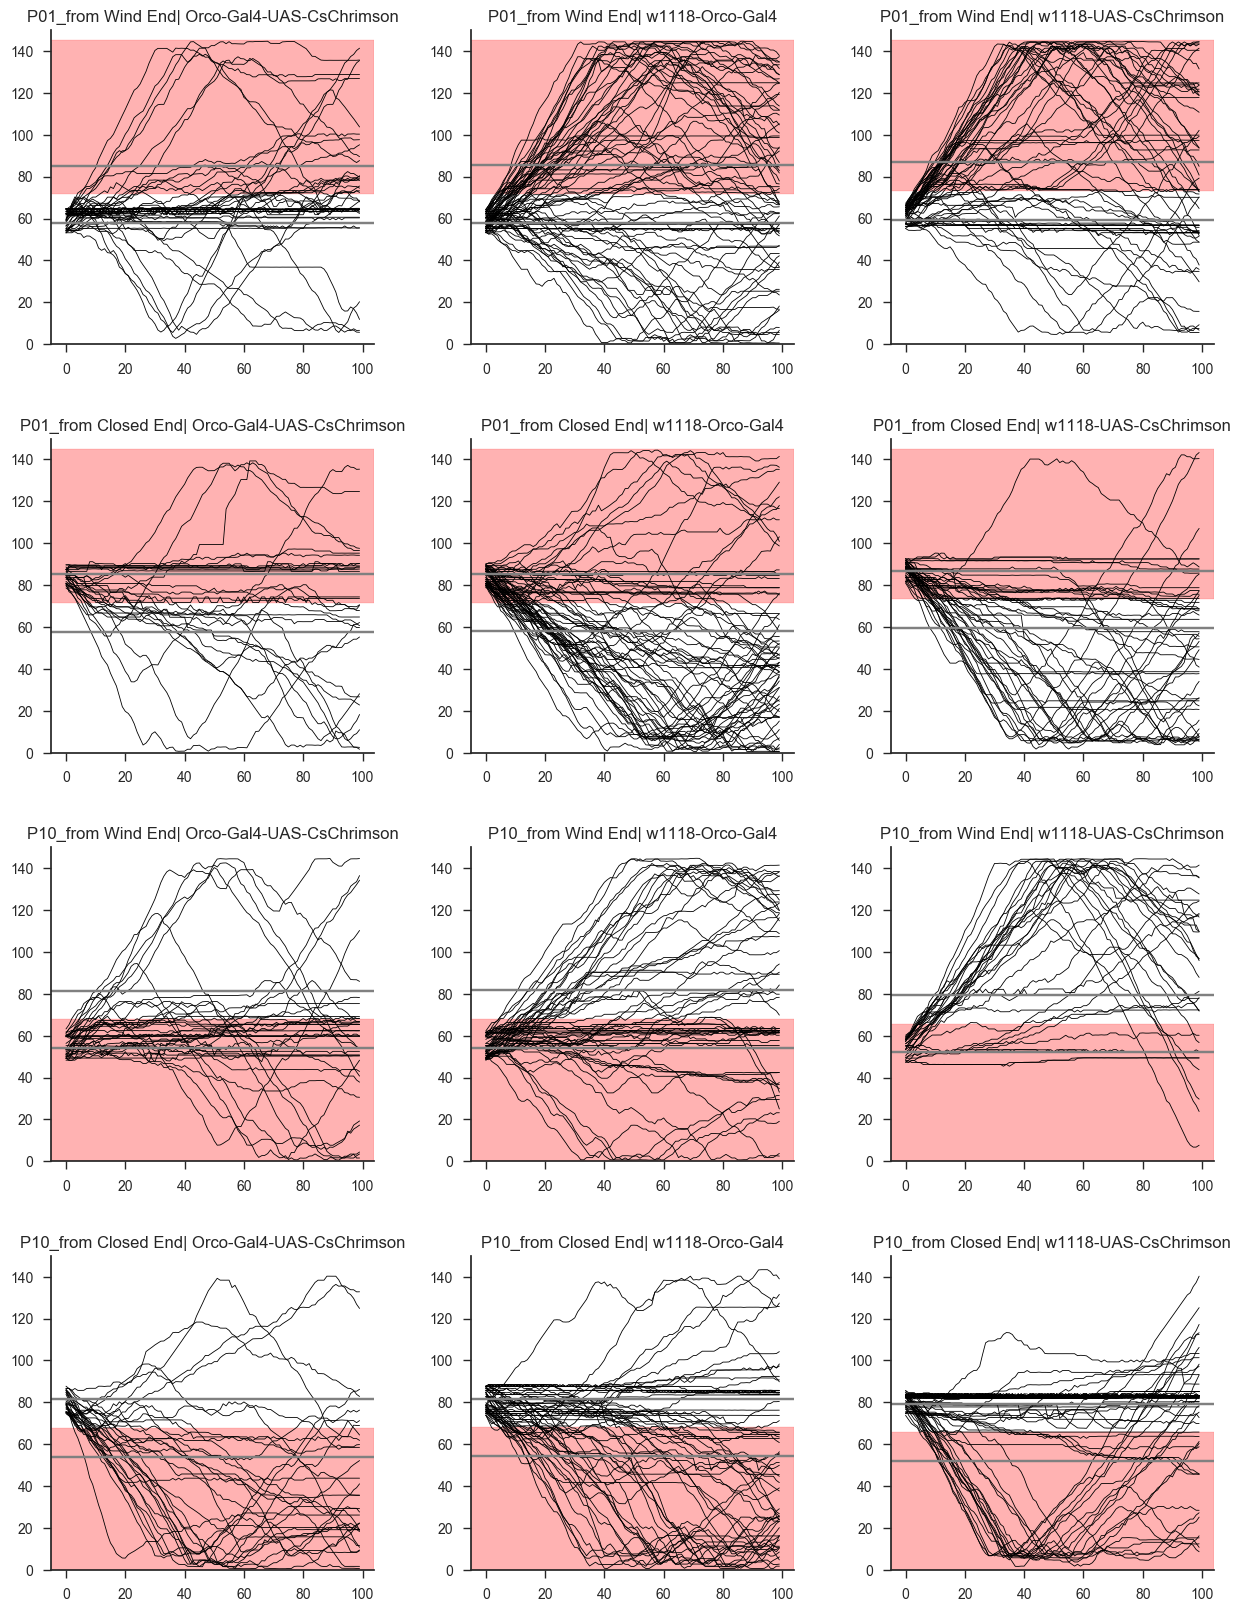

In [172]:
f = VisualizeTheChoiceZoneTrajectories(dff, singleFly = None, groupBy = None, groupsToPlot=None,
                                       durationAfterEntrance_frames = 100, ylim = [0,150])
f

In [173]:
plt.savefig('ChoiceZone_byGenotype.pdf',dpi=1000,bbox_inches='tight')

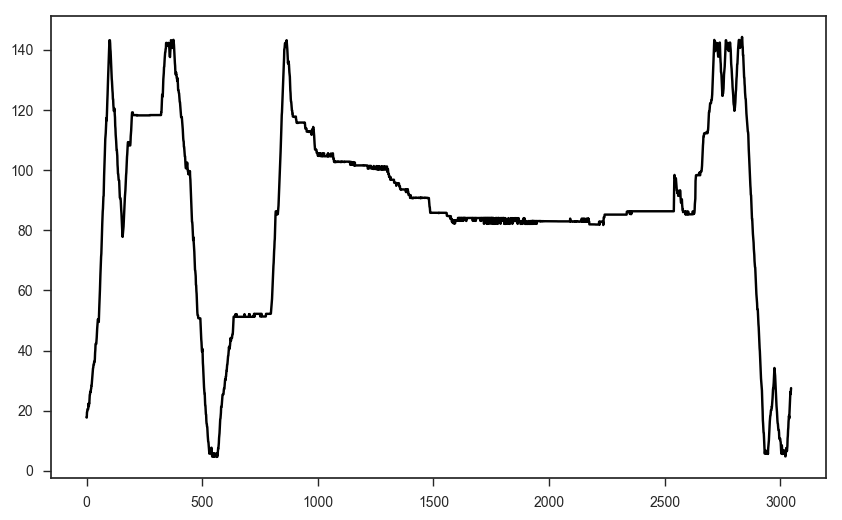

In [127]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1,1,1)

headX_P01 = dff.iloc[12]['HeadX(pix)']
#choiceZone_P01 = dff.iloc[12]['HeadX(pix)']

#i = 50
ax1.plot(range(len(headX_P01)), headX_P01,color='black')
# ax1.axhline(choiceZone_P01[0], color='grey')
# ax1.axhline(choiceZone_P01[1], color='grey')
fig

In [129]:
dff.iloc[12]['FromTheClosedEnd_P10_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX']

[[2, 83.069358825683594, 3, 84.067405700683594],
 [4, 82.122245788574219, 5, 84.036705017089844],
 [6, 83.069358825683594, 8, 84.067405700683594],
 [11, 83.069358825683594, 12, 84.067405700683594],
 [14, 83.065658569335938, 16, 84.036705017089844],
 [18, 83.10113525390625, 20, 84.067405700683594],
 [21, 83.069358825683594, 22, 84.036705017089844],
 [24, 83.069358825683594, 26, 84.036705017089844],
 [32, 83.069358825683594, 34, 84.036705017089844],
 [35, 82.122245788574219, 36, 84.036705017089844],
 [37, 82.122245788574219, 38, 84.036705017089844],
 [39, 82.122245788574219, 40, 84.036705017089844],
 [41, 82.122245788574219, 53, 84.036705017089844],
 [54, 83.069358825683594, 63, 84.036705017089844],
 [64, 83.069358825683594, 66, 84.036705017089844],
 [68, 83.069358825683594, 69, 84.036705017089844],
 [70, 82.122245788574219, 75, 83.976097106933594],
 [76, 83.069358825683594, 81, 84.036705017089844],
 [83, 83.069358825683594, 84, 84.036705017089844],
 [86, 83.069358825683594, 89, 84.03670

In [139]:
dff.iloc[12]['HeadX(pix)'][1773]

83.069358825683594

In [137]:
a[0]

83.069358825683594

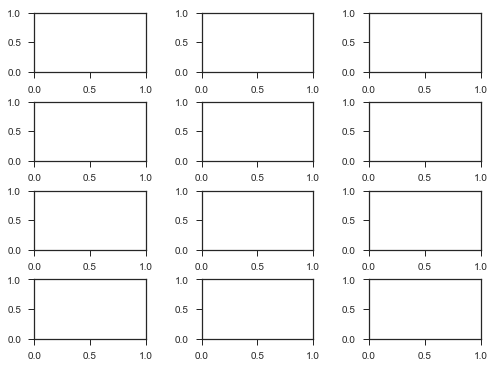

In [1005]:
fig, axs = plt.subplots(4,3, figsize=(8, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

In [970]:
a

array([list([63.381370220932368, 90.778629779067629]),
       list([63.30137022093237, 90.69862977906763]),
       list([63.091370220932376, 90.488629779067637]),
       list([62.901370220932364, 90.298629779067625]),
       list([62.861370220932372, 90.258629779067633]),
       list([62.80137022093237, 90.19862977906763]),
       list([62.481370220932376, 89.878629779067637]),
       list([62.341370220932376, 89.738629779067637]),
       list([62.131370220932368, 89.528629779067629]),
       list([62.081370220932371, 89.478629779067631]),
       list([61.951370220932375, 89.348629779067636]),
       list([61.781370220932374, 89.178629779067634]),
       list([61.661370220932369, 89.05862977906763]),
       list([61.431370220932365, 88.828629779067626]),
       list([61.171370220932374, 88.568629779067635]),
       list([61.011370220932363, 88.408629779067624]),
       list([60.791370220932365, 88.188629779067625]),
       list([60.55137022093237, 87.94862977906763]),
       list([60.3

In [828]:
entryIndexList = [dff.iloc[flyID]['FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX'][0][0],
                  dff.iloc[flyID]['FromTheWindPortEnd_P01_EnterIdx_ExitIdx_EnterHeadX_ExitHeadX'][1][0]]

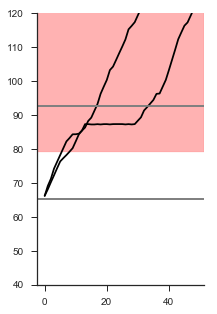

In [838]:
## Plot only around the decisions
fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(111)

sns.set(style="ticks", palette="bright", color_codes=True)
ax1.axhspan(border_P01,145,color='red',alpha = 0.3)
sns.despine()
ax1.set_ylim(40,120)

for i in entryIndexList:

    ax1.plot(range(50), headX_P01[i:i+50],color='black')
    ax1.axhline(choiceZone_P01[0], color='grey')
    ax1.axhline(choiceZone_P01[1], color='grey')


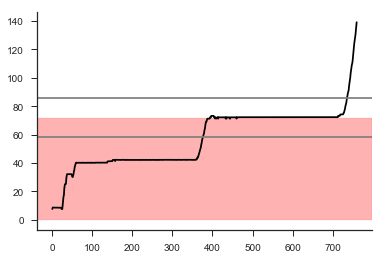

In [816]:
# P10

sns.set(style="ticks", palette="bright", color_codes=True)
plt.plot(range(len(headX_P10)), headX_P10,color='black')
plt.axhline(choiceZone_P10[0], color='grey')
plt.axhline(choiceZone_P10[1], color='grey')
plt.axhspan(0,border_P10,color='red',alpha = 0.3)
sns.despine()

i 666
92.7936019897
j 8
i 676


In [788]:
decisions

[[667, 90.696937561035156, 675, 92.799858093261719], [677, 92.6231689453125]]

In [748]:
headX_P01[667:][8]

92.799858093261719

In [791]:
headX_P01[677]

92.6231689453125

In [717]:
choiceZone_P01

[65.311370220932375, 92.708629779067635]

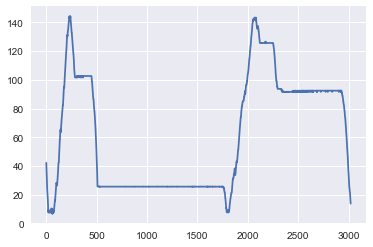

### Fractional time in the odorized zone

In [ ]:
def FractionalTimeinTheOdorizedZone(df):
    
    
    return

In [ ]:
## Plotting first time contacts of the flies in a given experiment

## Number of flies that never exposed to the light

no_contact_w_light_pat01 = sum(results['Pattern 01 First light contact index'].isnull())
no_contact_w_light_pat10 =sum(results['Pattern 10 First light contact index'].isnull())

## Light start-end indices
pat01_start = df_pat01.index[0]
pat01_end = df_pat01.index[-1]
pat10_start = df_pat10.index[0]
pat10_end = df_pat10.index[-1]

fig1 = plt.figure()
ax1 = plt.subplot(131)
ax2 = plt.subplot(133)

sns.set(style="ticks", palette="bright", color_codes=True)
sns.despine()
#ax1.set_ylabel('First light contact')
#ax1.set_xlabel('Time')

sns.swarmplot(y = 'Pattern 01 First light contact index', data=results,ax = ax1)
sns.swarmplot(y = 'Pattern 10 First light contact index', data=results,ax = ax2)
#ax1.boxplot(results['Pattern 01 First light contact index'])
#ax1.axvspan(p10_min,p10_max,color='red',alpha=0.3)
#ax1.axvspan(p01_min,p01_max,color='red',alpha=0.3)
ax1.axhline(pat01_start,color='red')
ax1.axhline(pat01_end,color='red')
ax2.axhline(pat10_start,color='red')
ax2.axhline(pat10_end,color='red')
ax1.set_title('Pattern 01')
ax2.set_title('Pattern 10')
#ax1.plot(range(len(data2)), data2,color='red')
#plt.savefig('HeadX_vs_Cx.pdf',dpi=1000,bbox_inches='tight')
plt.show()
print 'Never seen the light (Pat01) =',no_contact_w_light_pat01, 'Never seen the light (Pat10) =',no_contact_w_light_pat10 

In [ ]:
results

### Set your data folder 

In [ ]:
folder = "C:/Users/tumkayat/Desktop/ORScreening/OSAR/Orco-ACR1-Male-starved/"
os.chdir(folder)

### Can check how many .csv files is located under the folder

In [ ]:
dataFiles = os.listdir(folder)
len(dataFiles)

### Set how many last seconds you want to use for the analysis

In [ ]:
lastXseconds = 30

### Run this cell to do the analysis

In [ ]:
def calculatePI(data):
    numofTimePoints = len(data)
    totalTimeinLight = sum(data)
    totalTimeinDark = numofTimePoints - totalTimeinLight
    
    PI = float(totalTimeinLight - totalTimeinDark)/float(numofTimePoints)
    return PI

def splitDataintoEpochChunks(df):
    return np.split(lightON, np.where(np.diff(lightON.index.second) > 1)[0]+1)

temp = {'FileName':[], 'Pattern':[], 'FileName_pattern':[],'Date':[], 'StartTime':[], 'Genotype': [],'Status':[],'Status_Intensity': [], 'Intensity':[], 'LightType':[],
        'LightType_Intensity':[] ,'Intensity_Wind': [],'Wind': [],'LightType_Intensity_Wind':[],'Status_LightType_Intensity_Wind': [], 'SingleFlyPI':[], 'Half PI': []}


for f in dataFiles:
    if f[-4:] == '.csv':
        print f
        expInfo = f.split('_')
        #print expInfo
        date = expInfo[1]
        #startTime = expInfo[-5]
        #genotype = expInfo[-4]
        #intensity = expInfo[-3]
        #lightType = expInfo[-2]
        #windState = expInfo[-1][:-4]
        
        startTime = expInfo[2]
        genotype = expInfo[3]
        intensity = expInfo[4][3:]
        lightType = "Constant"
        windState = "NoAir"
        
        
        if 'w1118' in genotype:
            status = 'Parent'
        else:
            status = 'Offspring'
            
        df = pd.read_csv(f)
        timeIndex = pd.to_datetime(df['Time'])
        df = df.drop(['Time'], axis=1)
        df.index = (timeIndex)
        
        lightON = df[df['PatternState'] != 'Pattern 00']
        chunks = splitDataintoEpochChunks(lightON)
        
        for chunk in chunks:
            pattern = chunk['PatternState'][0]        
            
            lastTimePointofTheChunk = chunk.index[-1]            
            epoch = lastTimePointofTheChunk - dt.timedelta(seconds=lastXseconds)
            
            dataOfInterest = chunk.between_time(start_time=epoch.time(), end_time=lastTimePointofTheChunk.time())
            halfPI = dataOfInterest['LightPI'].mean()
            
            singleFlyData = dataOfInterest.filter(regex='_InLight')
            
            for col in singleFlyData:
                sfd = singleFlyData[col]
                sfPI = calculatePI(sfd)          
                
                temp['FileName'].append(f)
                temp['Pattern'].append(pattern)
                temp['FileName_pattern'].append(f + '_' + pattern)
                temp['Date'].append(date)
                temp['StartTime'].append(startTime)
                temp['Genotype'].append(genotype)
                temp['Status'].append(status)
                temp['Intensity'].append(intensity)
                temp['Status_Intensity'].append(status + '_' + intensity)
                temp['LightType'].append(lightType)
                temp['Wind'].append(windState)
                temp['Half PI'].append(halfPI)
                temp['SingleFlyPI'].append(sfPI)
                temp['LightType_Intensity'].append(lightType + '_' + intensity)
                temp['Intensity_Wind'].append(intensity + '_' + windState)
                temp['LightType_Intensity_Wind'].append(lightType + '_' + intensity + '_' + windState)
                temp['Status_LightType_Intensity_Wind'].append(status + '_' + lightType + '_' + intensity + '_' + windState)

results = pd.DataFrame(temp, columns=['FileName','Pattern', 'FileName_pattern', 'Date', 'StartTime', 'Genotype','Status', 'Intensity','LightType', 'Wind','LightType_Intensity','Intensity_Wind','Status_Intensity','LightType_Intensity_Wind','Status_LightType_Intensity_Wind','SingleFlyPI', 'Half PI'])
#upWind = results[results['Pattern'] == 'Pattern 10']
#downWind = results[results['Pattern'] == 'Pattern 01']



### The analysis (Single fly PI etc.) will be saved as a df called "results". You can display it here.

In [ ]:
results

### To plot the half PIs instead of Single Fly PI, run this cell. Otherwise NOT neccessary.

In [ ]:
halfPI = results.drop_duplicates('FileName_pattern')
halfPI = halfPI.drop('SingleFlyPI',1)

### Can see which genotypes there are in the analysis, and assign color to them for the plots

In [ ]:
print results['Genotype'].unique()
myPal = {#results['Genotype'].unique()[0] : 'cyan',
        results['Genotype'].unique()[0] : 'lightgreen',
        results['Genotype'].unique()[1] : 'red'}

### Can check the experimental conditions and use the ones you want to compare as "idx" in the next cells

In [ ]:
results['Status_LightType_Intensity_Wind'].unique()

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_EighthGreen_NoAir','Offspring_Constant_EighthGreen_NoAir'),                                        
                                        ('Parent_Constant_QuarterGreen_NoAir','Offspring_Constant_QuarterGreen_NoAir'),
                                        ('Parent_Constant_HalfGreen_NoAir','Offspring_Constant_HalfGreen_NoAir'),
                                        ('Parent_Constant_FullGreen_NoAir','Offspring_Constant_FullGreen_NoAir'),
                                        
                                      
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,6,2):
    fig.axes[j].legend_.remove()

for k in range(0,8,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind - Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind - Upwind and Downwind combined - Last 15 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),                                        
                                        
                                        
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),                                       
                                        
                                        
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind - Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind - UpWind - Last 15 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind (Upwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind - DownWind - Last 15 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                        
                                        
                                        
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind(Downwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind - Upwind and Downwind combined - Last 15 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                                                                                                       
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),                                                                              
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind (Upwind & Downwind) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind - Upwind - Last 15 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                                                                                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),                                    
                                                                               
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1.5),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Upwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind - Downwind - Last 15 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),                                                                               
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),                                       
                                                                                
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Downwind half) Last 15 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

## Warning: you have to set the "lastXsec" variable to 30, and run the analysis cell again before starting to plot 30sec data!

### Constant Light - No Wind (Downwind and Upwind) Last 30 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                                                              
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                                                            
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind (Downwind half) Last 30 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                                                              
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                                                            
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind (Downwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - No Wind (Upwind half) Last 30 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_NoAir','Offspring_Constant_14uW_NoAir'),
                                                                              
                                        ('Parent_Constant_42uW_NoAir', 'Offspring_Constant_42uW_NoAir'),
                                                                            
                                        ('Parent_Constant_70uW_NoAir', 'Offspring_Constant_70uW_NoAir')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - No wind (Upwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind (Downwind and Upwind) Last 30 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = results, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Downwind and Upwind) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind (Downwind half) Last 30 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = downWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Downwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

### Constant Light - Wind (Upwind half) Last 30 sec

In [ ]:
fig, contrastHalfPI = bs.contrastplot(data = upWind, 
                                x = 'Status_LightType_Intensity_Wind', y = 'SingleFlyPI', hue = 'Genotype',
                                 idx = (('Parent_Constant_14uW_Air','Offspring_Constant_14uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_42uW_Air', 'Offspring_Constant_42uW_Air'),
                                        
                                       
                                        
                                        ('Parent_Constant_70uW_Air', 'Offspring_Constant_70uW_Air')
                                        
                                        )                                   
                                ,
                                 pal = myPal,
                                 swarmYlim = (-1,1),
                                 contrastYlim = (-1,1),
                                 size = 6,
                                 figsize=(10,10),
                                 floatContrast = False,
                                 summaryBar = True,
                                 showAllYAxes = False)

for j in range(0,4,2):
    fig.axes[j].legend_.remove()

for k in range(0,6,1):
    labels = fig.axes[k].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment = 'right')

title = 'Constant light - Wind(Upwind half) Last 30 sec'
fig.suptitle(title,fontsize = 20)
plt.savefig(str(title) +'.pdf',dpi=1000,bbox_inches='tight')
contrastHalfPI.to_csv(str(title) +'.csv')

In [ ]:
os.close()